# Bagging

In [2]:
import numpy as np

# Sample 10 integers
sample = np.random.randint(low=1, high=100, size=10)
print('Original sample: %s' % sample)
print('Sample mean: %s' % sample.mean())

# Bootstrap re-sample 100 times by re-sampling with replacement from the original sample
resamples = [np.random.choice(sample, size=sample.shape) for i in range(100)]
print('Number of bootstrap re-samples: %s' % len(resamples))
print('Example re-sample: %s' % resamples[0])

resample_means = np.array([resample.mean() for resample in resamples])
print('Mean of re-samples\' means: %s' % resample_means.mean())

Original sample: [45 69 92 30 90 19 47 19  8 64]
Sample mean: 48.3
Number of bootstrap re-samples: 100
Example re-sample: [45 30  8 90 19 92  8 64 30 64]
Mean of re-samples' means: 48.271


In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X, y = make_classification(
    n_samples=1000, n_features=100, n_informative=20, n_clusters_per_class=2, random_state=11)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)

clf = DecisionTreeClassifier(random_state=11)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.73      0.66      0.69       127
          1       0.68      0.75      0.71       123

avg / total       0.71      0.70      0.70       250



In [4]:
clf = RandomForestClassifier(n_estimators=10, random_state=11)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
 

             precision    recall  f1-score   support

          0       0.74      0.83      0.79       127
          1       0.80      0.70      0.75       123

avg / total       0.77      0.77      0.77       250



# Boosting

In [6]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X, y = make_classification(
    n_samples=1000, n_features=50, n_informative=30, n_clusters_per_class=3, random_state=11)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)

clf = DecisionTreeClassifier(random_state=11)
clf.fit(X_train, y_train)
print('Decision tree accuracy: %s' % clf.score(X_test, y_test))

Decision tree accuracy: 0.688


Ensemble accuracy: 0.768


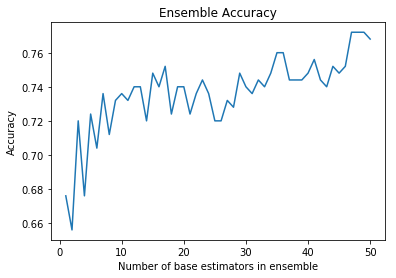

In [7]:
# When an argument for the base_estimator parameter is not passed, the default DecisionTreeClassifier is used
clf = AdaBoostClassifier(n_estimators=50, random_state=11)
clf.fit(X_train, y_train)
print('Ensemble accuracy: %s' % clf.score(X_test, y_test))
plt.title('Ensemble Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number of base estimators in ensemble')
plt.plot(range(1, 51), [accuracy for accuracy in clf.staged_score(X_test, y_test)])

# Stacking

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.base import clone, BaseEstimator, TransformerMixin, ClassifierMixin


class StackingClassifier(BaseEstimator, ClassifierMixin, TransformerMixin):
    
    def __init__(self, classifiers):
        self.classifiers = classifiers
        self.meta_classifier = DecisionTreeClassifier()

    def fit(self, X, y):
        for clf in self.classifiers:            
            clf.fit(X, y)

        self.meta_classifier.fit(self._get_meta_features(X), y)        
        return self

    def _get_meta_features(self, X):
        probas = np.asarray([clf.predict_proba(X) for clf in self.classifiers])
        return np.concatenate(probas, axis=1)
        
    def predict(self, X):
        return self.meta_classifier.predict(self._get_meta_features(X))

    def predict_proba(self, X):
        return self.meta_classifier.predict_proba(self._get_meta_features(X))


X, y = make_classification(
    n_samples=1000, n_features=50, n_informative=30, n_clusters_per_class=3, random_state=11)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)

In [10]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
print('Logistic regression accuracy: %s' % lr.score(X_test, y_test))

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
print('KNN accuracy: %s' % knn_clf.score(X_test, y_test))

Logistic regression accuracy: 0.816
KNN accuracy: 0.836


In [11]:
base_classifiers = [lr, knn_clf]
stacking_clf = StackingClassifier(base_classifiers)
stacking_clf.fit(X_train, y_train)
print('Stacking classifier accuracy: %s' % stacking_clf.score(X_test, y_test))

Stacking classifier accuracy: 0.852
